In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib_scalebar.scalebar import SI_LENGTH
from matplotlib.figure import Figure
from matplotlib.patches import Rectangle
from matplotlib import colors
from skimage import io
import os
from matplotlib import cm, colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy import interpolate
from scipy.interpolate import griddata
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = 10, 6


# Tracking figure colorbar

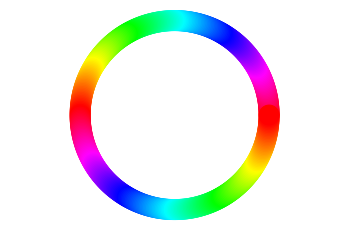

In [3]:
color = []
theta = np.linspace(0, 2*np.pi, 400)
for t in theta:
    if t > np.pi:
        t -= np.pi
    cohsv = ((np.pi-t)/np.pi, 1, 1)
    corgb = colors.hsv_to_rgb(cohsv)
    color.append(corgb)
cnum = range(0, len(color))
cmap = colors.ListedColormap(color)
x = np.cos(theta)
y = np.sin(theta)
plt.scatter(x, y, marker='o', s=400, cmap=cmap, c=cnum)
plt.axis('equal')
plt.axis('off')
plt.savefig('circ_colorbar.pdf', format='pdf')

In [4]:
color = []
theta = np.linspace(0, np.pi, 400)
for t in theta:
    if t > np.pi:
        t -= np.pi
    cohsv = ((np.pi-t)/np.pi, 1, 1)
    corgb = colors.hsv_to_rgb(cohsv)
    color.append(corgb)
cnum = range(0, len(color))
cmap = colors.ListedColormap(color)
x = np.zeros((len(theta), 1))
y = theta
plt.scatter(x, y, marker='s', s=400, cmap=cmap, c=cnum)
plt.axis('equal')
plt.axis('off')
plt.savefig('normal_colorbar.pdf', format='pdf')

(-0.03285543608124255,
 0.03285543608124252,
 0.7819333850629582,
 3.302137064603772)

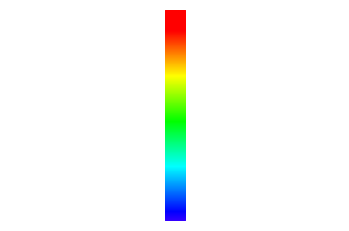

In [5]:
color = []
theta = np.linspace(.3*np.pi, np.pi, 400)
for t in theta:
    if t > np.pi:
        t -= np.pi
    cohsv = ((np.pi-t)/np.pi, 1, 1)
    corgb = colors.hsv_to_rgb(cohsv)
    color.append(corgb)
cnum = range(0, len(color))
cmap = colors.ListedColormap(color)
x = np.zeros((len(theta), 1))
y = theta
plt.scatter(x, y, marker='s', s=400, cmap=cmap, c=cnum)
plt.axis('equal')
plt.axis('off')
# plt.savefig('normal_colorbar.pdf', format='pdf')

# PIV plot

In [38]:
imgDir = r'E:\Google Drive\Code\Python\Peng\PIV_rainbow\40x30fps80od_100p0rk_9vt1500.tif'
dataDir = r'E:\Google Drive\Code\Python\Peng\PIV_rainbow\fig1.dat'
img = plt.imread(imgDir)

data = pd.read_csv(dataDir, names=['X', 'Y', 'U', 'V', 'C'], sep='\t')
xlen = 65
ylen = 65
names = ['X', 'Y', 'U', 'V', 'C']
pdatac = {}
pdata = {}
pdatao = {}
for name in names:
    pdatao[name] = np.array(data[name]).reshape((xlen,ylen))
    pdata[name] = pdatao[name][0:xlen:2, 0:ylen:2]
    pdatac[name] = pdata[name][1:32, 1:32]

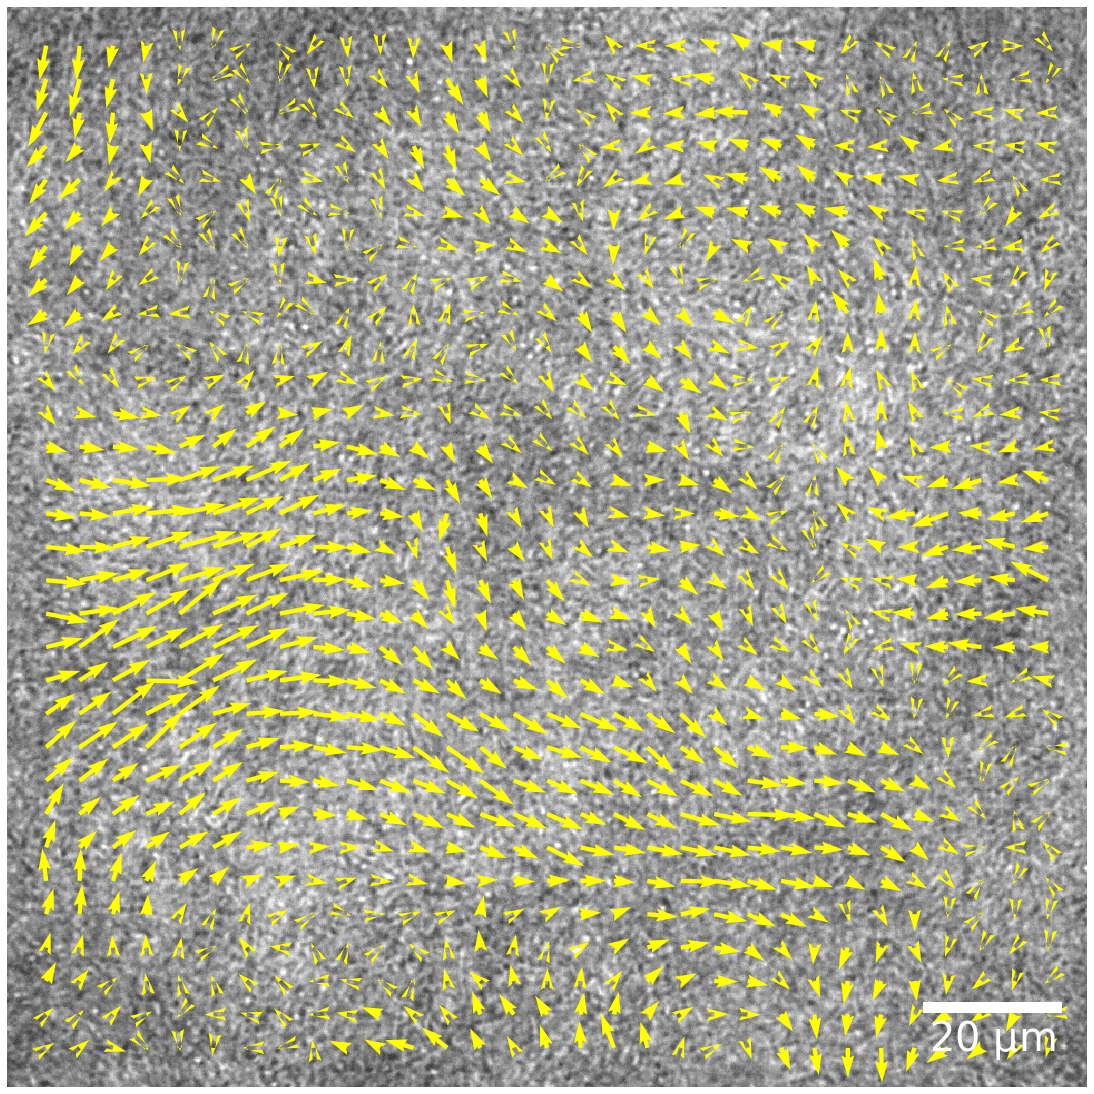

In [34]:
figsize = (15, 15)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0,0,1,1])
img2 = np.flipud(img)
ax.imshow(img2, cmap='gray', alpha=0.75)
ax.quiver(pdatac['X'], pdatac['Y'], pdatac['U'], -pdatac['V'], color='yellow',
          minshaft=-1, minlength=0, width=0.004, joinstyle='round')
#           headlength=3, headwidth=2, minshaft=-1, width=0.005, minlength=0, headaxislength=2)
ax.axis('off')
ax.axis([15,985, 985, 15])
scalebar = ScaleBar(0.16, 'um', SI_LENGTH, frameon=False, color='white', font_properties={'size': 40},
                   pad=2, location='lower right', fixed_value=20) # 1 pixel = 0.2 1/cm
ax.add_artist(scalebar)
fig.savefig('PIV_yellow.pdf', format='pdf')

In [40]:
imgDir = r'E:\Github\Python\ForFun\Peng\OP\newdata\1.jpg'
dataDir = r'E:\Github\Python\ForFun\Peng\OP\newdata\piv.csv'
names = ['X', 'Y', 'U', 'V', 'C', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
img = io.imread(imgDir, as_gray=True)
data = pd.read_csv(dataDir, names=names, sep=',')
xlen = 65
ylen = 65
names_c = ['X', 'Y', 'U', 'V', 'C']
pdatac = {}
pdata = {}
pdatao = {}
for name in names_c:
    pdatao[name] = np.array(data[name]).reshape((xlen,ylen))
    pdata[name] = pdatao[name][0:xlen:2, 0:ylen:2]
    pdatac[name] = pdata[name][1:32, 1:32]

In [42]:
figsize = (15, 15)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0,0,1,1])
img2 = np.flipud(img)
ax.imshow(img2, cmap='gray', alpha=0.75)
ax.quiver(pdatac['X'], pdatac['Y'], pdatac['U'], -pdatac['V'], color='yellow',
          minshaft=-1, minlength=0, width=0.004, joinstyle='round')
#           headlength=3, headwidth=2, minshaft=-1, width=0.005, minlength=0, headaxislength=2)
ax.axis('off')
ax.axis([15,985, 985, 15])
scalebar = ScaleBar(0.16, 'um', SI_LENGTH, frameon=False, color='white', font_properties={'size': 40},
                   pad=2, location='lower right', fixed_value=20) # 1 pixel = 0.2 1/cm
ax.add_artist(scalebar)
fig.savefig('PIV_yellow_new.pdf', format='pdf')

# Order parameter color map
* Smoothing using scipy.interpolate.griddata

In [9]:
# Load OP data
folder = r'E:\Google Drive\Code\MATLAB\Zhengyang\Research\misc\color_surface\test_data'
data = pd.read_csv(os.path.join(folder, 'orderen_60x10fps80n0_100pg0r_30perl_10umt301.dat'), names=['x', 'y', 'e', 'op', 'vort'], sep='\t')

In [10]:
# Create rainbow colormap
cL =  pd.read_csv(os.path.join(r'I:\Google Drive\Code\MATLAB\Zhengyang\Research\misc\color_surface', 'rainbow_color.csv'), 
                  names=['r', 'g', 'b'], sep=',')
cL /= 255 # important note: mpl colormap numbers are on 0-1 scale
cL = cL.assign(a=1)
newcmp = ListedColormap(np.array(cL)[int(0.3*len(cL)):len(cL), :])

(-0.5, 64.5, 64.5, -0.5)

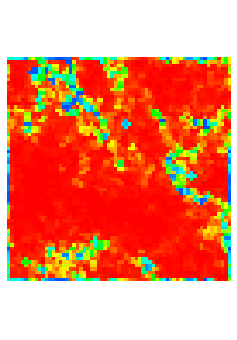

In [11]:
# Draw original OP map
plt.figure(figsize=(4, 6))
nx = data.x.drop_duplicates().shape[0]
ny = data.y.drop_duplicates().shape[0]
plt.imshow(np.array(data.op).reshape(nx, ny).transpose(), cmap=newcmp)
plt.axis('equal')
plt.axis('off')

(-0.5, 1139.5, 1739.5, -0.5)

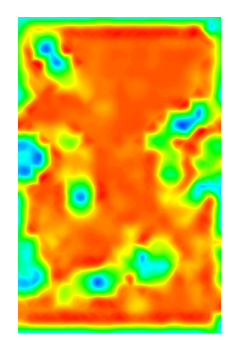

In [12]:
# smoothing
plt.figure(figsize=(4, 6))
points = np.array([np.array(data.x), np.array(data.y)]).transpose()
values = np.array(data.op)
xnew, ynew = np.mgrid[1: data.x.max():60j*nx, 1: data.y.max():60j*ny]
smooth = griddata(points, values, (xnew, ynew), method='cubic')
plt.imshow(smooth.T, cmap=newcmp)
plt.axis('off')

* Full script

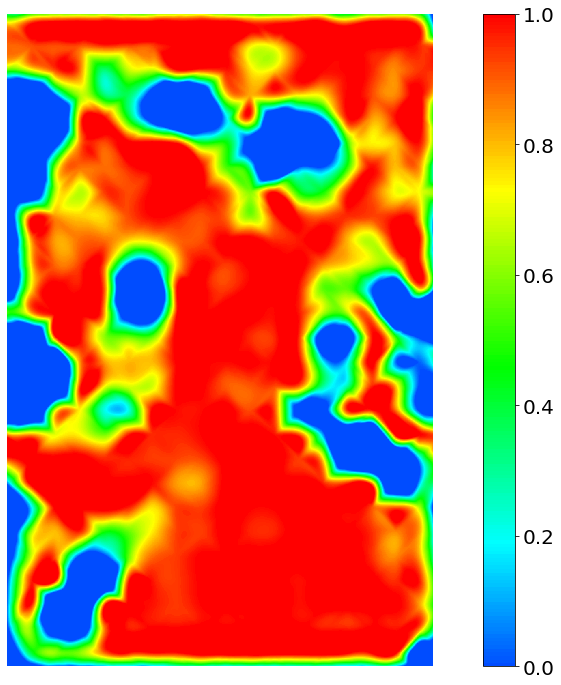

In [13]:
# Load data
folder = r'E:\Google Drive\Code\MATLAB\Zhengyang\Research\misc\color_surface\test_data'
data = pd.read_csv(os.path.join(folder, 'orderen_60x10fps80n0_100pg0r_30perl_10umt301.dat'), names=['x', 'y', 'u', 'v', 'op', 'vort'], sep='\t')
# Smoothing
fig = plt.figure(figsize=(18, 12))
points = np.array([np.array(data.x), np.array(data.y)]).transpose()
values = np.array(data.op)
xnew, ynew = np.mgrid[1: data.x.max():60j*nx, 1: data.y.max():60j*ny]
smooth = griddata(points, values, (xnew, ynew), method='cubic')
# Set plotting scale
vmin=0
vmax=.95
# Draw color plot
plt.imshow(smooth.T, vmin=vmin, vmax=vmax, cmap=newcmp)
plt.axis('off')
plt.axis([60, smooth.shape[0]-30, 90, smooth.shape[1]-40])
# Draw colorbar
nm = colors.Normalize(vmin=vmin, vmax=1) # set vmax as 1 to make colorbar look better
sm = cm.ScalarMappable(norm=nm, cmap=newcmp)
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
# Save fig 
plt.savefig(r'E:\Github\Python\ForFun\Peng\OP\OP.pdf', format='pdf')

In [7]:
# Load data
folder = r'I:\Github\Python\ForFun\Peng\OP\newdata'
data = pd.read_csv(os.path.join(folder, 'fig1.csv'), names=['x', 'y', 'u', 'v', 'op'], sep=',')
# Smoothing
fig = plt.figure(figsize=(15, 10))
points = np.array([np.array(data.x), np.array(data.y)]).transpose()
values = np.array(data.op)
xnew, ynew = np.mgrid[1: data.x.max():1000j, 1: data.y.max():1000j]
smooth = griddata(points, values, (xnew, ynew), method='cubic')
# Set plotting scale
vmin=0
vmax=.95
# Draw color plot
plt.imshow(smooth.T, vmin=vmin, vmax=vmax, cmap=newcmp)
plt.axis('off')
plt.axis([50, smooth.shape[0]-50, 50, smooth.shape[1]-50])
# Draw colorbar
nm = colors.Normalize(vmin=vmin, vmax=1) # set vmax as 1 to make colorbar look better
sm = cm.ScalarMappable(norm=nm, cmap=newcmp)
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
# Save fig 
plt.savefig(r'I:\Github\Python\ForFun\Peng\OP\OP.pdf', format='pdf')

NameError: name 'newcmp' is not defined

<Figure size 1080x720 with 0 Axes>

In [21]:
# Load OP data
folder = r'I:\Google Drive\Code\MATLAB\Zhengyang\Research\misc\color_surface\test_data'
data = pd.read_csv(os.path.join(folder, 'orderen_60x10fps80n0_100pg0r_30perl_10umt301.dat'), names=['x', 'y', 'e', 'op', 'vort'], sep='\t')
# Draw original OP map
plt.figure(figsize=(4, 6))
nx = data.x.drop_duplicates().shape[0]
ny = data.y.drop_duplicates().shape[0]
plt.imshow(np.array(data.op).reshape(nx, ny).transpose(), interpolation='spline16', cmap=newcmp)
plt.axis('equal')
plt.axis('off')
# Save fig 
plt.savefig(r'I:\Github\Python\ForFun\Peng\OP\OP_pdf.pdf',  format='pdf')

In [22]:
25/50000*0.01

5e-06

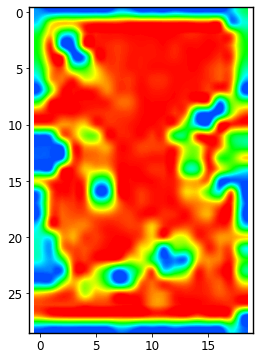

In [23]:
# Load OP data
folder = r'I:\Google Drive\Code\MATLAB\Zhengyang\Research\misc\color_surface\test_data'
data = pd.read_csv(os.path.join(folder, 'orderen_60x10fps80n0_100pg0r_30perl_10umt301.dat'), names=['x', 'y', 'e', 'op', 'vort'], sep='\t')
# Draw original OP map
plt.figure(figsize=(4, 6))
nx = data.x.drop_duplicates().shape[0]
ny = data.y.drop_duplicates().shape[0]
plt.imshow(np.array(data.op).reshape(nx, ny).transpose(), interpolation='spline16', cmap=newcmp)
plt.axis('equal')
# plt.axis('off')
# Save fig 
plt.savefig(r'I:\Github\Python\ForFun\Peng\OP\OP_interp.svg', format='svg')

# custom rainbow colormap (blue-red)

In [44]:
cL =  pd.read_csv(os.path.join(r'E:\Google Drive\Code\MATLAB\Zhengyang\Research\misc\color_surface', 'rainbow_color.csv'), 
                  names=['r', 'g', 'b'], sep=',')
cL /= 255 # important note: mpl colormap numbers are on 0-1 scale
cL = cL.assign(a=1)
newcmp = ListedColormap(np.array(cL)[int(0.3*len(cL)):len(cL), :])

In [16]:
plt.imshow(np.flipud(grid_z2.T), extent=(0,1,0,1), cmap=newcmp)
plt.axis('off')
plt.colorbar()

NameError: name 'grid_z2' is not defined

# Vorticity and streamline

In [51]:
# Load PIV data
pivdata = pd.read_csv \
        (r'E:\Github\Python\ForFun\Peng\OP\newdata\vor.csv',\
        names=['x', 'y', 'u', 'v', 'vor'])
# Smooth pivdata to original image size
points = np.array([np.array(pivdata.x), np.array(pivdata.y)]).transpose()
values = np.array(pivdata.vor)
xnew, ynew = np.mgrid[1: 1000 :1000j, 1: 1000:1000j]
smooth = griddata(points, values, (xnew, ynew), method='cubic')
# Set the scale in which data are color coded
vmin = -3
vmax = 3
cmap = newcmp # IDL rainbow colormap 0.3-1
# Set scissors
xmin = 50
xmax = 950
ymin = 50
ymax = 950
#############################################

# Draw vorticity map as an image using imshow
fig = plt.figure(figsize=(15, 12))
plt.imshow(smooth.T, cmap=newcmp, vmin=vmin, vmax=vmax)
plt.axis([xmin, xmax, ymin, ymax])
plt.axis('off')

# Create Figure.Colorbar object 
nm = colors.Normalize(vmin=vmin, vmax=vmax)
sm = cm.ScalarMappable(norm=nm, cmap=newcmp)
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

# Load streamline data (from MATLAB streamslice function)
vert = pd.read_csv \
        (r'E:\Google Drive\Code\MATLAB\Zhengyang\Research\misc\streamLine\vert.csv', \
         names=['x', 'y', 'idx'])
avert = pd.read_csv \
        (r'E:\Google Drive\Code\MATLAB\Zhengyang\Research\misc\streamLine\avert.csv', \
         names=['x', 'y', 'idx'])

# Draw streamlines
for i in vert.idx.drop_duplicates():
    subvert = vert.loc[vert.idx==i]
    subvert = subvert.loc[(subvert.x>xmin)&(subvert.x<xmax)&(subvert.y>ymin)&(subvert.y<ymax)]
    plt.plot(subvert.x, subvert.y, color='black')
for i in avert.idx.drop_duplicates():
    subavert = avert.loc[avert.idx==i]
    plt.plot(subavert.x, subavert.y, color='black')
    
plt.savefig(r'E:\Github\Python\ForFun\Peng\streamline\sl.pdf', format='pdf')

## Phase diagram

In [3]:
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

In [15]:
data = pd.read_csv(r'E:\Google Drive\Code\MATLAB\Zhengyang\Research\misc\phaseDiagram\phasediagram.dat',
                  names=['v', 'n', 'disorder', 'order'], sep='\t')

In [17]:
data.head()

v   n  disorder  order
0  10.4765  20       1.0    NaN
1  10.4765  30       0.9    NaN
2  10.4765  30       1.0    NaN
3  10.4765  35       NaN    1.0
4  10.4765  40       0.6    NaN

In [28]:
import matplotlib.font_manager
from IPython.core.display import HTML
def make_html(fontname):
 return "<p>{font}: <span style='font-family:{font}; font-size:24px;'>{font}</p>".format(font=fontname)
code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])
HTML("<div style='column-count: 2;'>{}</div>".format(code)) 

<IPython.core.display.Javascript object>


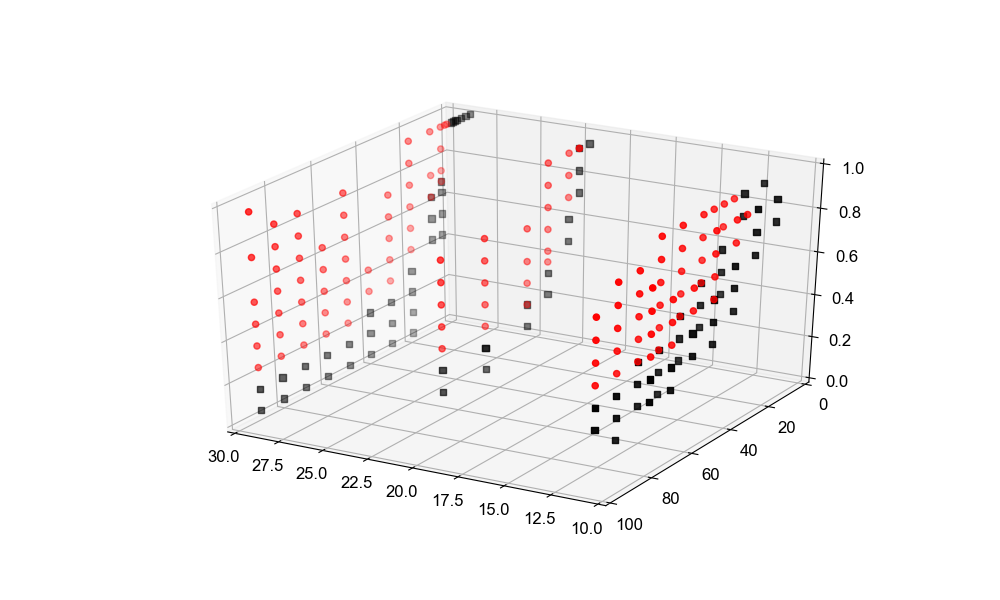

AttributeError: 'YAxis' object has no attribute 'set_scale'

In [53]:
# %matplotlib notebook
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(data.v, data.n, data.disorder, c='black', marker='s')
ax.scatter(data.v, data.n, data.order, c='red', marker='o')
ax.set(xlim=(30, 10), ylim=(100, 0), zlim=(0, 1))
ax.yaxis.set_scale('log')